In [1]:
(asdf:load-system :imago/jupyter)
(asdf:load-system :diff-boundary-corrfn)
(asdf:load-system :numpy-file-format)

T

T

T

In [2]:
(load "/jails/julia/home/vasily/surface-paper-2/notebooks/ellipses.lisp")

T

In [5]:
;; Create three ellipses
(defparameter *field*
  (ellipses:ellipses
    (list
      (ELLIPSES:ELLIPSIS 0.002168612496922906d0 -0.26791021452168473d0 1.1999682496688058d0 0.8931911930730743d0 0.979971637744016d0)
      (ELLIPSES:ELLIPSIS -0.32947197484630486d0 -0.4005530044567822d0 1.2033186603502093d0 1.161657136533338d0 0.9865000043758921d0)
      (ELLIPSES:ELLIPSIS 0.007458268697206671d0 0.26089115912252137d0 1.0716778562734515d0 1.014399902649373d0 0.14142811139484715d0))))

*FIELD*

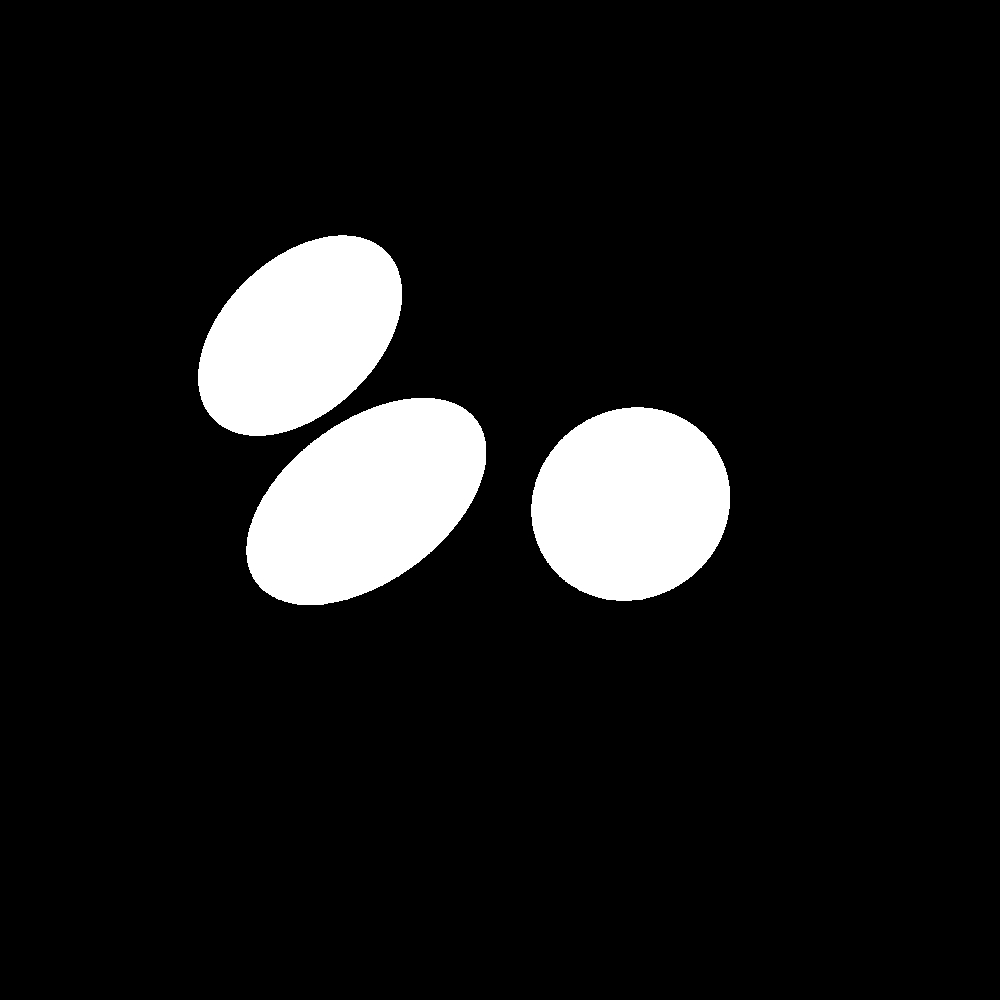

In [7]:
;; Evaluate a function defining ellipses in uniform grid (3000x3000) and save the result as an image
(let ((image (imago:make-binary-image-from-pixels
               (let ((descr (diff-boundary-corrfn:discretize-field 3000 *field*)))
                 (aops:vectorize* 'bit (descr) (if (< descr 0.2) 1 0))))))
  (imago:write-image image "/jails/julia/home/vasily/field.pbm")
  (imago-jupyter:show-image
    (imago:resize image 1000 1000)))

In [8]:
;; Evaluate F_{ss} in a half-circle with R = 0.1
(time
  (defparameter *ss*
    (let ((cl-optim:*ε* 1d-5)
          (diff-boundary-corrfn:*ε-threshold* 2d-3))
      (sb-int:with-float-traps-masked
        (:divide-by-zero)
        (diff-boundary-corrfn:surface-surface-at-dist *field* 0.2d0 1d-1 200)))))

*SS*

Evaluation took:
  111.989 seconds of real time
  111.993136 seconds of total run time (111.820140 user, 0.172996 system)
  [ Run times consist of 0.850 seconds GC time, and 111.144 seconds non-GC time. ]
  100.00% CPU
  425,553,091,394 processor cycles
  232,837,825,136 bytes consed
  


In [9]:
;; Save it as a numpy array
(numpy-file-format:store-array
  (let ((ss (remove-if (alexandria:rcurry #'> 50) *ss* :key #'first)))
    (make-array (list (length ss) 3) :element-type 'double-float :initial-contents ss))
  "/jails/julia/home/vasily/ss-precise.npy")

NIL